# Algo de choix

Notebook de simulation, proof of concept et explication.
On défini un cas d'usage, et le script repete l'assignation 10000 fois, du coup la probabilité d'être choisi pour chaque photographe = le pourcentage de fois où il a été choisi(approximativement mais l'erreur d'approximation est assez faible avec 10000 répétitions).


## Imports (ignorer)

In [3]:
%matplotlib inline

import pandas as pd, numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from algo_test import *

sns.set()
type_seance ='solo'

# Principe de base et cas simpliste

Le principe de base : si un photographe a une note X fois supérieure a un autre photographe, il a X fois plus de chance de se faire choisir.
Par exemple, 2 photographes A et B, A a une note 2 fois supérieure a B

results


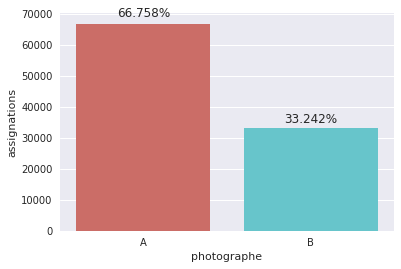

In [5]:
notes_photographes = {
    'A':10,
    'B':5,
}
##### IGNORE #####
results = simulate(notes_photographes,n=100000)
df = pd.DataFrame(data={'photographe':list(results.keys()),'assignations':list(results.values())}).sort_values('photographe')
print('results')
ax=sns.barplot(y='assignations',x='photographe',data=df,palette=sns.color_palette('hls',len(notes_photographes.keys())))
autolabel(ax, labels=df.assignations.values, height_factor=1.02)


Comme prévu, photographe A a été assigné 2 fois de plus que B. (vous pouvez varier les notes et rerun la cellule)

Mais bon le concept a beau être simple, quand il y a plusieurs photographes, plusieurs coefficients (note_ever, coef de bonus proximité, coef de bonus préference type de seance

# Calcul de la note et cas plus complexe

Maintenant on ajoute le calcul de la note en fonction des paramètres.

Les paramètres sont les suivants (pour l'instant):
 - **note_ever** la note manuelle que vous leur donnez (défaut 0)
 - **seance_adjacente** True si le photographe a une séance dans un créneau horaire adjacent à la séance à assigner (défaut False)
 - **seance_adjacente_2** Pareil mais pour une séance a 2h( par ex. la séance est a 14h et le photographe a déja une séance a 16h ou 12h) (défaut False)
 - **types_favoris** Type de séance favoris, pour la simulation j'ai jsute mis 2 types de séance, 'solo' et 'couple'.
(défault ['solo','couple'])


type de seance = 'solo' 
5 photographes, A,B,C,D,E.  
A et B ont une déjà une séance dans un créneau horaire adjacent.  
C a une séance dans un créneau horaire 2h plus tard(ou 2h avant).  
D et E n'ont pas de séance ce jour. 

Ils sont definis comme ceci :

In [6]:
photographes = {
    'A':{'note_ever':10,'seance_adjacente':True,'types_favoris':['solo','couple']},
    'B':{'note_ever':2,'seance_adjacente':True,'types_favoris':['solo','couple']},
    'C':{'note_ever':10,'seance_adjacente':False,'seance_adjacente_2':True,'types_favoris':['couple']},
    'D':{'note_ever':5,'seance_adjacente':False,'types_favoris':['solo','couple']},
    'E':{'note_ever':10,'seance_adjacente':False,'types_favoris':['solo','couple']},
} 
type_seance = 'solo'

A partir de ces arguments, on a une fonction de calcul qui donne sa note finale à chaque photographe, c'est cette note qui détermine la probablité d'être assignée.  
** Ce sont les paramètres de cette fonction que vous devez définir parce qu'ils seront fixes**


Par exemple:
 - **seance_adjacente** donne une coef bonus x1.5
 - **seance_adjacente_2** donne un bonus de x1.2
 - Si le type de séance est dans **types_favoris**, bonus de x1.5
 
Ce qui donne

In [9]:
params = {
    'seance_adjacente':1.5,
    'seance_adjacente_2':1.2,
    'type_favori':1.5
}
notes = calcul_notes_coef(photographes,type_seance,**params)
##### IGNORE #####
for key in sorted(notes.keys()):
    print("%s: %s" % (key, notes[key]/100.0))

A: 22.5
B: 4.5
C: 12.0
D: 7.5
E: 15.0


D'ou découle les probabilités d'assignations suivantes :

Photographes


,A,B,C,D,E
note_ever,10,5,10,5,10
seance_adjacente,True,True,False,False,False
seance_adjacente_2,False,False,True,False,False
types_favoris,"[solo, couple]","[solo, couple]",[couple],[couple],"[solo, couple]"


Paramètres


,seance_adjacente,seance_adjacente_2,type_favori
coef,1.5,1.2,1.5


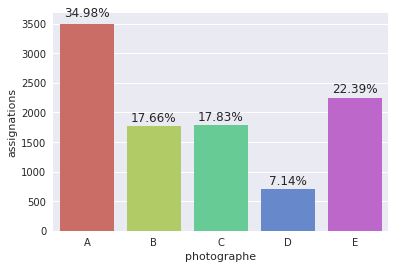

In [15]:
photographes = {
    'A':{'note_ever':10,'seance_adjacente':True,'types_favoris':['solo','couple']},
    'B':{'note_ever':5,'seance_adjacente':True,'types_favoris':['solo','couple']},
    'C':{'note_ever':10,'seance_adjacente':False,'seance_adjacente_2':True,'types_favoris':['couple']},
    'D':{'note_ever':5,'seance_adjacente':False,'types_favoris':['couple']},
    'E':{'note_ever':10,'seance_adjacente':False,'types_favoris':['solo','couple']},
} 
type_seance = 'solo'
params = {
    'seance_adjacente':1.5,
    'seance_adjacente_2':1.2,
    'type_favori':1.5
}
##### IGNORE #####
notes = calcul_notes_coef(photographes,type_seance,**params)
results= simulate(notes)
df = pd.DataFrame(data={'photographe':list(results.keys()),'assignations':list(results.values())}).sort_values('photographe')
print('Photographes')
display(pd.DataFrame(photographes).fillna(False))
print('Paramètres')
display(pd.DataFrame(params,index=['coef']))
ax=sns.barplot(y='assignations',x='photographe',data=df,palette=sns.color_palette('hls',len(notes.keys())))
autolabel(ax, labels=df.assignations.values, height_factor=1.02)
##################